### Initialize networks

Load the provided models beforing using the code

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plot

#Values correspond to:
#PGA(g),PGV(cm/s),VSI(cm),CAV(cm/s),Ia(cm/s),0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.075,0.09,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,1,1.2,1.5,2,2.5,3,4,5,6,7.5,8,9,10 (in g)
Hmean = np.array([-2.302047, 2.473122, 3.669296, 6.312668, 3.057819, -2.312948, -2.305280, -2.297893, -2.242485, -2.196774, -2.139324, -2.070812, -1.979889, -1.895615, -1.844840, -1.643876, -1.557526, -1.534690, -1.601045, -1.673765, -1.767820, -1.868775, -1.924689, -1.977987, -2.078978, -2.174449, -2.356918, -2.592827, -2.954934, -3.266635, -3.506091, -3.905959, -4.236532, -4.555701, -4.961825, -5.100721, -5.337379, -5.556379, 115.381500])
Hstd = np.array([1.492175, 1.482218, 1.507728, 0.925792, 2.388539, 1.540362, 1.544463, 1.548517, 1.494246, 1.522532, 1.551600, 1.574780, 1.600333, 1.608581, 1.608934, 1.540236, 1.533748, 1.547385, 1.546812, 1.523359, 1.543890, 1.556369, 1.554066, 1.553836, 1.552897, 1.558311, 1.562931, 1.561245, 1.537614, 1.533772, 1.515544, 1.518601, 1.532063, 1.527194, 1.487316, 1.479149, 1.458825, 1.437517, 184.699177])

Vmean = np.array([-2.853406, 1.659890, 2.853367, 5.834876, 1.981173, -2.835309, -2.805027, -2.777335, -2.657528, -2.512529, -2.364705, -2.266805, -2.165574, -2.116056, -2.094453, -2.122249, -2.201415, -2.373027, -2.518197, -2.636738, -2.735641, -2.836600, -2.887473, -2.935076, -3.020364, -3.094715, -3.228540, -3.422249, -3.694641, -3.951175, -4.155762, -4.548618, -4.936411, -5.281893, -5.703807, -5.850398, -6.082738, -6.304037, 115.381500])
Vstd = np.array([1.632056, 1.544941, 1.480248, 0.872823, 2.431571, 1.598003, 1.602077, 1.608025, 1.649677, 1.716608, 1.743693, 1.752411, 1.747002, 1.728143, 1.717429, 1.643882, 1.587753, 1.581643, 1.556865, 1.527486, 1.510609, 1.517992, 1.505465, 1.493254, 1.499093, 1.514171, 1.517938, 1.515418, 1.509536, 1.567632, 1.599989, 1.656779, 1.650531, 1.623565, 1.582051, 1.571345, 1.567108, 1.556395, 184.699177])

### Inputs

In [ ]:
T = [0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.075,0.09,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,1,1.2,1.5,2,2.5,3,4,5,6,7.5,8,9,10]
Case = int(input("Enter required component (1: Horizontal, 2: Vertical): "))
R = float(input("Enter epicentral distance (km): "))
print('Select the one of cutoff periods: 0.75, 1, 1.5, 2 (in seconds)')
Ts = float(input("Enter cutoff period: T*: "))
print('Enter PSA values at frequencies displayed:')

if Case == 1 and Ts == 0.75:
  n = 17
  freq = T[17:]
  print(T[17:])
  model = load_model('0_75H_SSR22.h5')
if Case == 1 and Ts == 1:
  n = 20
  freq = T[20:]
  print(T[20:])
  model = load_model('1H_SSR22.h5')
if Case == 1 and Ts == 1.5:
  n = 22
  freq = T[22:]
  print(T[22:])
  model = load_model('1_5H_SSR22.h5')
if Case == 1 and Ts == 2:
  n = 23
  freq = T[23:]
  print(T[23:])
  model = load_model('2H_SSR22.h5')
if Case == 2 and Ts == 0.75:
  n = 17
  freq = T[17:]
  print(T[17:])
  model = load_model('0_75V_SSR22.h5')
if Case == 2 and Ts == 1:
  n = 20
  freq = T[20:]
  print(T[20:])
  model = load_model('1V_SSR22.h5')
if Case == 2 and Ts == 1.5:
  n = 22
  freq = T[22:]
  print(T[22:])
  model = load_model('1_5V_SSR22.h5')
if Case == 2 and Ts == 2:
  n = 23
  freq = T[23:]
  print(T[23:])
  model = load_model('2V_SSR22.h5')

PSA_Input = []
PSA_Input.append([float(x) for x in input("Enter PSA seperated by comma (,)\n").replace(" ", "").split(',')])

PSA_Input = np.squeeze(PSA_Input,axis=0)
Inputs = np.concatenate([np.log(PSA_Input), [R]])
print('The inputs are: ', Inputs)

if Case == 1:
  Input_norm = np.expand_dims(np.divide(Inputs - Hmean[5+n:],Hstd[5+n:]),1).T
if Case == 2:
  Input_norm = np.expand_dims(np.divide(Inputs - Vmean[5+n:],Vstd[5+n:]),1).T

Enter required component (1: Horizontal, 2: Vertical): 1
Enter epicentral distance (km): 450
Select the one of cutoff periods: 0.75, 1, 1.5, 2 (in seconds)
Enter cutoff period: T*: 0.75
Enter PSA values at frequencies displayed:
[0.75, 0.8, 0.9, 1, 1.2, 1.5, 2, 2.5, 3, 4, 5, 6, 7.5, 8, 9, 10]
Enter PSA seperated by comma (,)
0.010667155, 0.009289457, 0.007394631, 0.007195484, 0.006791829, 0.007474992, 0.00364597, 0.004135618, 0.004064867, 0.002802588, 0.002108097, 0.001208835, 0.001304736, 0.001433111, 0.001203185, 0.001133962
The inputs are:  [ -4.54058588  -4.67887518  -4.90700108  -4.93430167  -4.99203501
  -4.89619223  -5.61413283  -5.48811851  -5.50537425  -5.877212
  -6.16196963  -6.71809819  -6.64175456  -6.54790767  -6.72278307
  -6.78203758 450.        ]


### Output

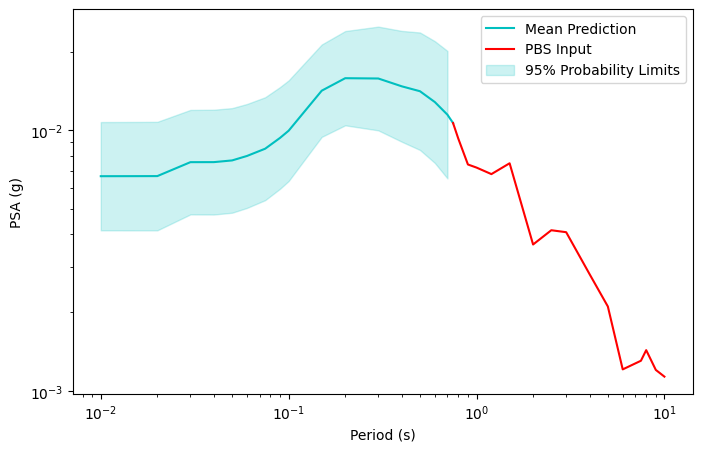

In [ ]:
count = 100
pred = []
for _ in range(100):
  if Case == 1:
    pred += [model.predict(np.expand_dims(Input_norm,axis=2),verbose=0) * np.float32(tf.transpose(Hstd[:5+n])) + np.float32(Hmean[:5+n])]
  else:
    pred += [model.predict(np.expand_dims(Input_norm,axis=2),verbose=0) * np.float32(tf.transpose(Vstd[:5+n])) + np.float32(Vmean[:5+n])]

fig, ax = plot.subplots(1,1,figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')

emean = np.exp(np.mean(pred,axis=0))
estd = np.std(pred,axis=0)
ax.plot(T[:n+1],np.concatenate([tf.squeeze(emean[:,5:],axis=0),[tf.math.exp(Inputs[0])]]), color='c', label='Mean Prediction', linewidth=1.5)
ax.plot(T[n:],tf.math.exp(Inputs[:33-n]), color='r', label='PBS Input', linewidth=1.5)

lower_error = emean - np.exp(np.mean(pred,axis=0) - 1.96*estd)
upper_error = np.exp(np.mean(pred,axis=0) + 1.96*estd) - emean
lower_bound = tf.squeeze(np.exp(np.mean(pred,axis=0) - 1.96*estd),axis=0)[5:]
upper_bound = tf.squeeze(np.exp(np.mean(pred,axis=0) + 1.96*estd),axis=0)[5:]
ax.fill_between(T[:n], lower_bound, upper_bound, color='c', alpha=.2, label='95% Probability Limits')

ax.set_xlabel("Period (s)")
ax.set_ylabel("PSA (g)")
ax.legend()